# Background
이전 연구에서 뉴스의 존재여부가 수익률에 큰 영향을 미친다는 사실을 알게 되었다.  
그렇다면 뉴스가 있는 매매를 한다는 전제조건 하에 어느 시간대를 피해야할까?

# Import

In [51]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Load

In [52]:
df = pd.read_csv('data.csv')
df.head()

,주문일자,체결시간,종목명,매수가,수익률,매매기법,종목코드,매수등락률,고가등락률,시가등락률,뉴스기사
0,2022-03-29,09:09:07,고려시멘트,5230,2.87,NaN,198440,16.22,24.44,6.22,1
1,2022-03-29,09:28:09,고려시멘트,5410,1.85,NaN,198440,20.22,24.44,6.22,1
2,2022-03-29,10:38:18,고려시멘트,5441,0.15,NaN,198440,20.91,24.44,6.22,1
3,2022-03-29,09:51:11,영진약품,5490,0.66,NaN,3520,6.60,10.10,0.19,1
4,2022-03-29,09:58:16,버킷스튜디오,5060,-0.59,NaN,66410,11.58,18.85,3.09,1


# Preprocessing

In [53]:
df = df[df['뉴스기사'] == 1]

In [54]:
df = df.sort_values('체결시간')

# Visualization
빨간선(수익률=0%)이 손익의 기준이다.   
[노란선 좌측] 손실 구간이다. (수익 < 손실) → 09시 08분 이전    
[가운데 중앙] 수익 구간이다. (수익 > 손실)  
[초록선 우측] 손실 구간이다. (수익 < 손실) → 14시 20분 이후   

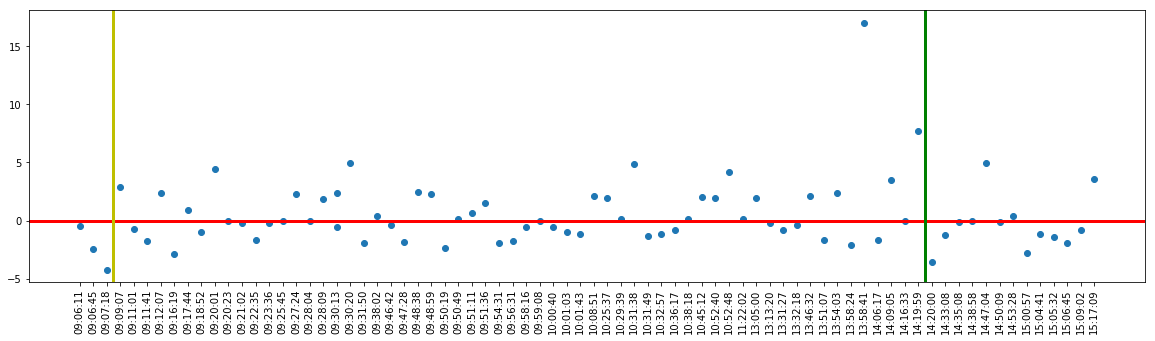

In [56]:
plt.scatter(df['체결시간'],df['수익률'])
plt.xticks(rotation=90)
plt.axhline(y=0, color='r', linewidth=3)
plt.axvline(x=2.5, color='y', linewidth=3)
plt.axvline(x=62.5, color='g', linewidth=3)
plt.rcParams["figure.figsize"] = (20, 5)
plt.show()

# Conclusion
매매시간: 09시 08분 ~ 14시 20분    
점심시간: 11시 ~ 13시